<a href="https://colab.research.google.com/github/ahsanansari7/class_assessment/blob/main/VegetableImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [14]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
# downloading dataset
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

100% 532M/534M [00:21<00:00, 25.2MB/s]
100% 534M/534M [00:21<00:00, 26.1MB/s]


In [15]:
%ls

 Grapevine_Leaves_Image_Dataset/   kaggle.json  'Vegetable Images'/


In [ ]:
# unzip the folder vegetable-image-dataset
!kaggle datasets download -d misrakahmed/vegetable-image-dataset --unzip --force

100% 532M/534M [00:17<00:00, 32.5MB/s]
100% 534M/534M [00:17<00:00, 31.3MB/s]


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator


In [17]:
base_dir = "/content/drive/MyDrive/Kaggle/Vegetable Images"
testing_dir = "/content/drive/MyDrive/Kaggle/Vegetable Images/test"
training_dir = "/content/drive/MyDrive/Kaggle/Vegetable Images/train"
validation_dir = "/content/drive/MyDrive/Kaggle/Vegetable Images/validation"

In [19]:
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
                    training_dir,
                    target_size=(150,150),
                    class_mode='categorical',
                    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
                            validation_dir,
                            target_size=(150,150),
                            class_mode='categorical',
                            batch_size=126
)


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [20]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [22]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
history = model.fit(train_generator, epochs=25,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=3)

Epoch 1/25
120/120 [==============================] - 1047s 9s/step - loss: 2.2560 - accuracy: 0.2331 - val_loss: 1.6369 - val_accuracy: 0.4206
Epoch 2/25
120/120 [==============================] - 228s 2s/step - loss: 1.7239 - accuracy: 0.4053 - val_loss: 1.7398 - val_accuracy: 0.4339
Epoch 3/25
120/120 [==============================] - 213s 2s/step - loss: 1.3571 - accuracy: 0.5358 - val_loss: 1.3248 - val_accuracy: 0.5397
Epoch 4/25
120/120 [==============================] - 205s 2s/step - loss: 1.0820 - accuracy: 0.6351 - val_loss: 1.7517 - val_accuracy: 0.4762
Epoch 5/25
120/120 [==============================] - 185s 2s/step - loss: 0.8664 - accuracy: 0.7135 - val_loss: 0.9576 - val_accuracy: 0.6852
Epoch 6/25
120/120 [==============================] - 174s 1s/step - loss: 0.7168 - accuracy: 0.7633 - val_loss: 0.5150 - val_accuracy: 0.7910
Epoch 7/25
120/120 [==============================] - 166s 1s/step - loss: 0.5852 - accuracy: 0.8100 - val_loss: 0.7532 - val_accuracy: 0.730

In [26]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test accuracy: {test_acc:.3f}")

24/24 [==============================] - 16s 668ms/step - loss: 0.0583 - accuracy: 0.9863
Test accuracy: 0.986


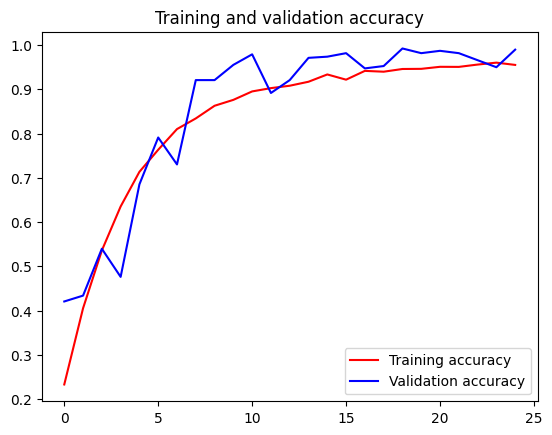

<Figure size 640x480 with 0 Axes>

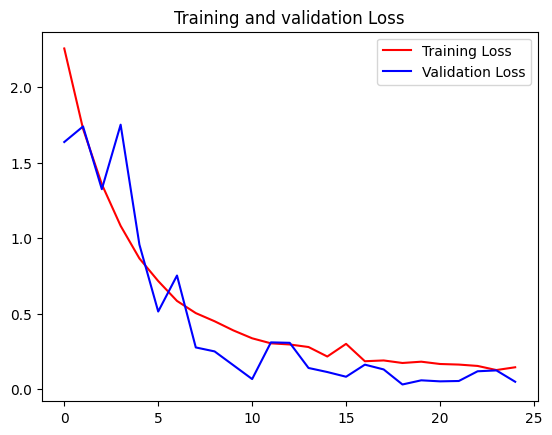

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()